In [2]:
import pandas as pd   # Imorting all the libraries

In [3]:
import numpy as np

In [4]:
import seaborn as sns

In [5]:
import math as mh

In [6]:
data = pd.read_excel("transaction_dataset.xlsx")   # importing the data set.

In [7]:
data.head()                  # checking the data before starting analysis

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [8]:
(data.columns)         # listing columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')

In [9]:
data.isnull().sum()     # checking  null values

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

In [10]:
data.describe()        # basic information

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


# The average transcation amount is 187.93 (shown by the output of describe function)

<AxesSubplot:xlabel='card_present_flag', ylabel='age'>

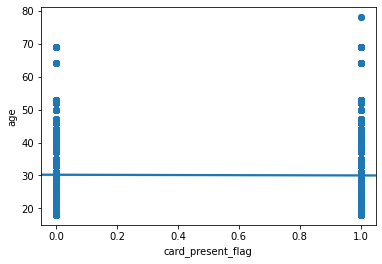

In [11]:
sns.regplot(x='card_present_flag', y='age', data = data )

In [12]:
## I used sns.regplot(x='card_present_flag', y='age', hue='gender', data = data )  
##, so that 'hue' will highlight the genders accordingly ,
#but it was giving a persistent error that 'hue' wasn't a parameter. 

<AxesSubplot:xlabel='age'>

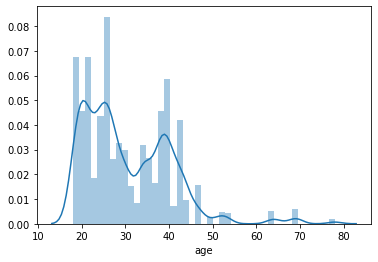

In [13]:
sns.distplot(data['age'])

<AxesSubplot:xlabel='balance'>

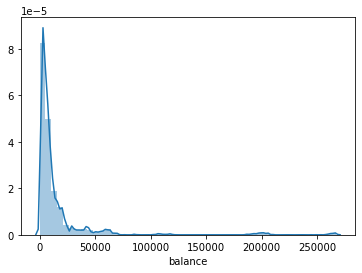

In [14]:
sns.distplot(data['balance'])

In [15]:
data['date']

0       2018-08-01
1       2018-08-01
2       2018-08-01
3       2018-08-01
4       2018-08-01
           ...    
12038   2018-10-31
12039   2018-10-31
12040   2018-10-31
12041   2018-10-31
12042   2018-10-31
Name: date, Length: 12043, dtype: datetime64[ns]

In [49]:
options = []
n = 1
while n in range(1,31):
    options.append('2018-08-' + str(n))
    n += 1
    
ndf = data[data['date'].isin(options)]


In [52]:
ndf['date']

0      2018-08-01
1      2018-08-01
2      2018-08-01
3      2018-08-01
4      2018-08-01
          ...    
3785   2018-08-30
3786   2018-08-30
3787   2018-08-30
3788   2018-08-30
3789   2018-08-30
Name: date, Length: 3790, dtype: datetime64[ns]

In [54]:
ndf.describe()

,card_present_flag,merchant_code,balance,age,amount
count,2431.000000,283.0,3790.000000,3790.000000,3790.000000
mean,0.804607,0.0,10846.661148,30.538786,183.020293
std,0.396584,0.0,28029.102777,10.300728,575.957240
min,0.000000,0.0,0.240000,18.000000,1.520000
25%,1.000000,0.0,1609.800000,22.000000,15.560000
50%,1.000000,0.0,3114.380000,27.000000,28.225000
75%,1.000000,0.0,6870.385000,38.000000,51.585000
max,1.000000,0.0,262153.860000,78.000000,8835.980000


# Transanctions made per month = 3790

In [63]:
ndf['customer_id']

0       CUS-2487424745
1       CUS-2487424745
2       CUS-2142601169
3       CUS-1614226872
4       CUS-2487424745
             ...      
3785    CUS-3117610635
3786    CUS-4023861240
3787     CUS-443776336
3788    CUS-2142601169
3789     CUS-443776336
Name: customer_id, Length: 3790, dtype: object

In [101]:
ar = np.array(ndf['customer_id'])
print(ar)

['CUS-2487424745' 'CUS-2487424745' 'CUS-2142601169' ... 'CUS-443776336'
 'CUS-2142601169' 'CUS-443776336']


In [104]:
(unique, counts) = np.unique(ar, return_counts=True)

In [105]:
frequencies = np.asarray((unique, counts)).T

In [106]:
ndf_frequency = pd.DataFrame(frequencies, columns=['customer_id', 'counts'])

In [107]:
print(ndf_frequency)

       customer_id counts
0   CUS-1005756958     50
1   CUS-1117979751     42
2   CUS-1140341822     15
3   CUS-1147642491     28
4   CUS-1196156254     76
..             ...    ...
95    CUS-72755508     19
96   CUS-809013380     59
97   CUS-860700529     48
98   CUS-880898248     32
99   CUS-883482547     60

[100 rows x 2 columns]


In [125]:
ndf_frequency['counts'].mean()


37.9

## Average transcantiopn per customer in a month is 37.9